In [403]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib
gen = np.random.default_rng()
%matplotlib inline

In [128]:
def gillespie(Ns = [600,400]): # Ns = N0, N+, N-
    g = [1, -1]
    N = np.sum(Ns)
    cumulative = [0]
    counts = np.array([0, 0])  #N-, N0, N+
    r2 = gen.uniform(size = N)
    for j in range(N):
        a = [(Ns[i] - counts[i]) / (N - j) for i in range(2)]
        mu = 0
        n = r2[j] - a[mu]
        while n>0:
            mu+=1
            n -=a[mu]
        cumulative.append(cumulative[-1] + g[mu])
        counts[mu] += 1
    return np.array(cumulative)

In [129]:
def gillespie1(Ns = [0,600,400]):
    Ns = np.array(Ns)
    N = np.sum(Ns)
    cumulative = [0]
    for j in range(N):
        next = gen.choice([0,1,-1], p=Ns/(N-j))
        cumulative.append(cumulative[-1] + next)
        Ns[next] -= 1
    return np.array(cumulative)

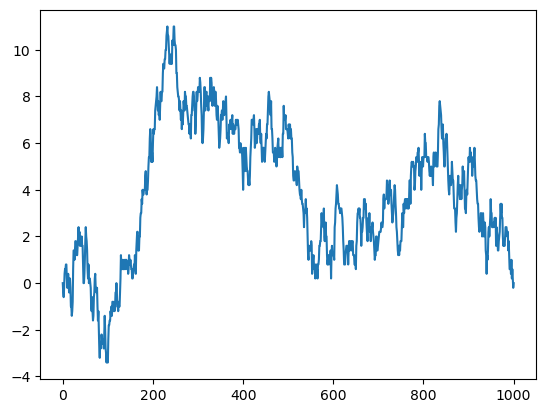

In [162]:
diffs = []
for m in range(10):
    diffs.append(gillespie() - gillespie1())
plt.plot(np.mean(diffs, axis = 0))
plt.show()

In [131]:
t = np.linspace(0, 1, 1001)
x = np.array([gillespie() for _ in range(100)])

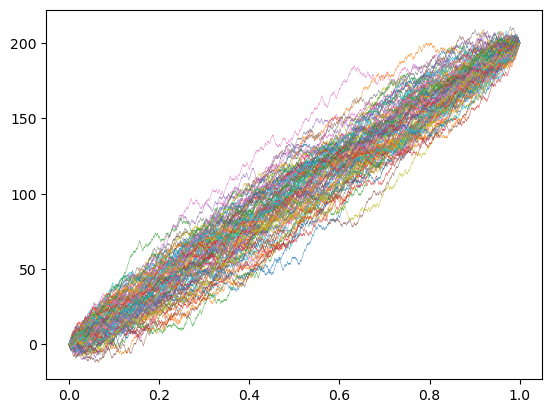

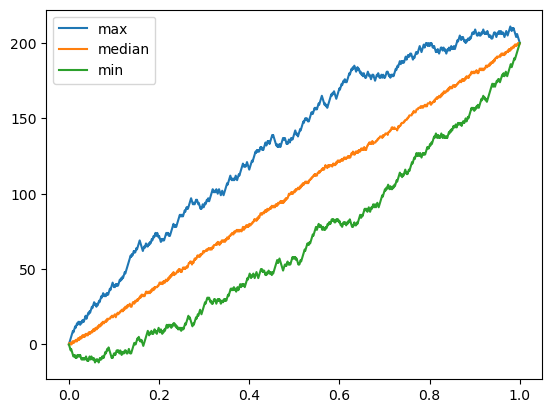

In [132]:
plt.plot(t, x.T,linewidth=0.3,alpha=1)
plt.show()
max = np.max(x,axis=0)
min = np.min(x,axis=0)
med = np.median(x,axis=0)
plt.plot(t, max,label="max")
plt.plot(t, med,label="median")
plt.plot(t, min,label="min")
plt.legend()
plt.show()

In [133]:
# find empirical distribution of intersection locations (with null path) and number of intersections
def intersection_density(Ns, M): 
    N = sum(Ns)
    x0 = np.arange(N+1) * (Ns[0] - Ns[1]) / N
    intersections = np.zeros([M,N+1])
    for i in range(M):
        x = gillespie(Ns)
        y = x - x0
        # intersections[i,1:] = (np.sign(y[1:]) != np.sign(y[:-1]))
        intersections[i,1:] = y[1:] == 0
    inter_number = np.sum(intersections, axis = 1)
    inters = np.argwhere(intersections == 1).T[1] / N
    return inters, inter_number

In [134]:
Ns = [100, 900] # N0, N+, N-
N = sum(Ns)
inters, inter_number = intersection_density(Ns = Ns, M = 10000)

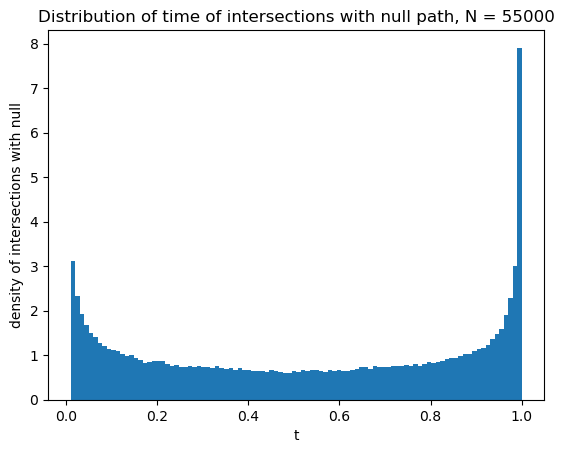

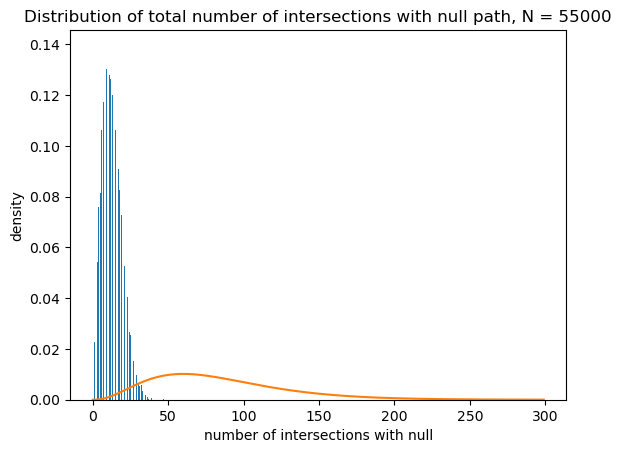

In [145]:
plt.hist(inters, bins = 100, density = True)
plt.title(f"Distribution of time of intersections with null path, N = {N}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(inter_number, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N = {N}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")

# Gamma distribution guess
j = np.arange(300)
a = 3.5
gamma = st.gamma.pdf(j, a, scale = 60 / (a-1))
ax.plot(j,gamma)
plt.show()

In [136]:
mean_recurrences = 1 / inter_number
print(f'mean of mean recurrence times = {np.mean(mean_recurrences)}')

mean of mean recurrence times = 0.11697624015648457


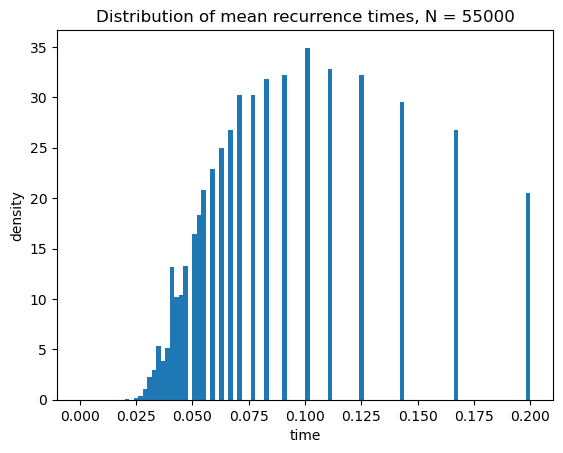

In [152]:
fig, ax = plt.subplots()
ax.hist(mean_recurrences, bins = 100, density = True, range = [0,0.2])
ax.set_title(f"Distribution of mean recurrence times, N = {N}")
ax.set_xlabel("time")
ax.set_ylabel("density")
plt.show()

In [138]:
k = int(N/2)
random_inter, random_internum = intersection_density(Ns=[k, k], M = 10000)

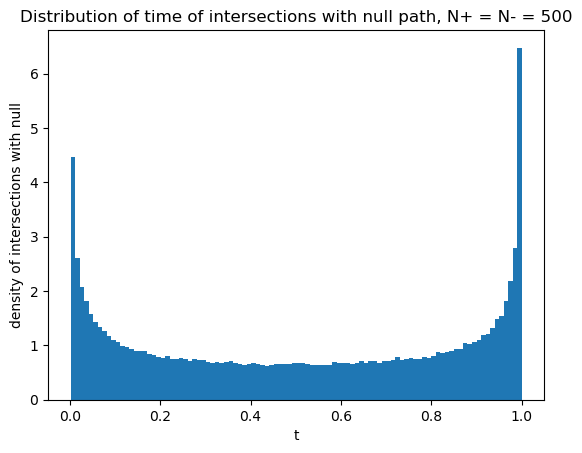

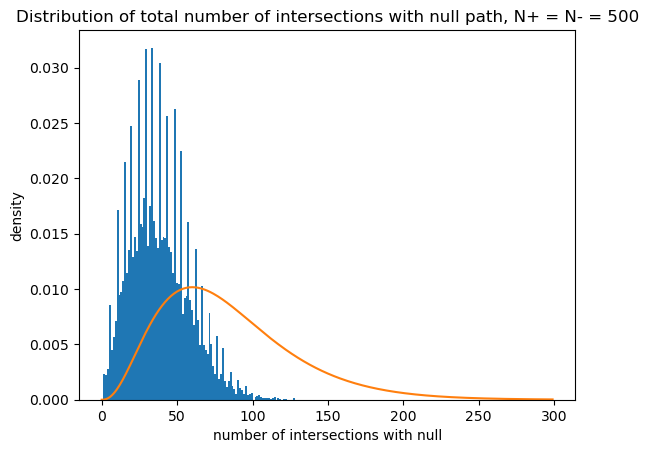

In [139]:
plt.hist(random_inter, bins = 100, density = True)
plt.title(f"Distribution of time of intersections with null path, N+ = N- = {k}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(random_internum, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N+ = N- = {k}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")
ax.plot(j,gamma)
plt.show()

In [140]:
rand_mean_recurrences = 1 / random_internum
print(f'mean of mean recurrence times = {np.mean(rand_mean_recurrences)}')

mean of mean recurrence times = 0.03961154392606045


In [141]:
Ns = [5000, 50000] # N0, N+, N-
N = sum(Ns)
big_inters, big_inter_number = intersection_density(Ns = Ns, M = 1000)

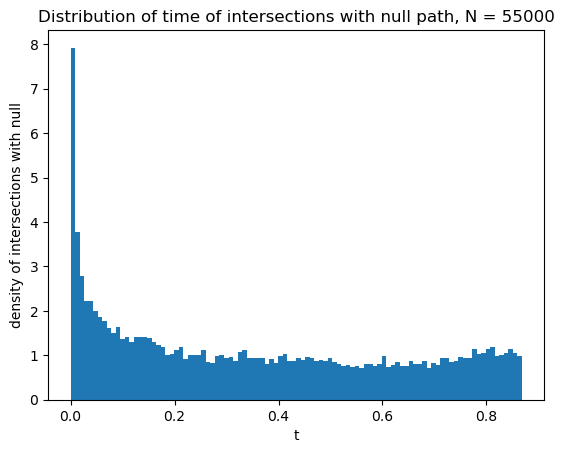

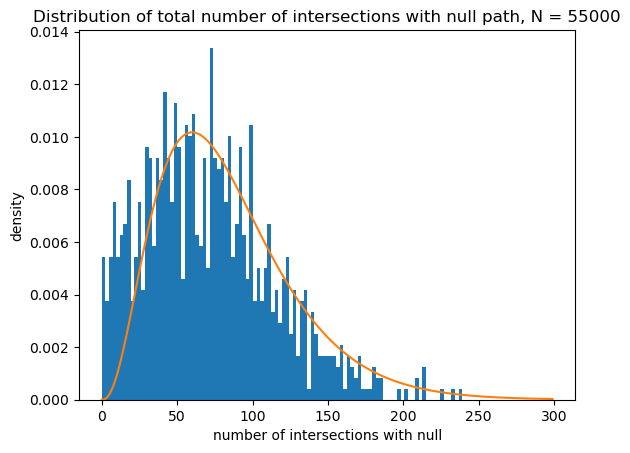

In [142]:
plt.hist(big_inters, bins = 100, density = True)
plt.title(f"Distribution of time of intersections with null path, N = {N}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(big_inter_number, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N = {N}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")    
ax.plot(j,gamma)
plt.show()

In [147]:
big_mean_recurrences = 1 / big_inter_number
print(f'mean of mean recurrence times = {np.mean(big_mean_recurrences)}')

mean of mean recurrence times = inf


C:\Users\prope\AppData\Local\Temp\ipykernel_33240\3594211287.py:1: RuntimeWarning: divide by zero encountered in divide
  big_mean_recurrences = 1 / big_inter_number


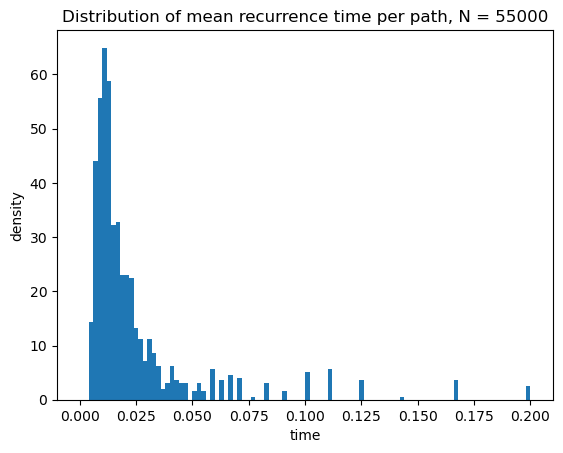

In [148]:
fig, ax = plt.subplots()
ax.hist(big_mean_recurrences, bins = 100, density = True, range = [0,0.2])
ax.set_title(f"Distribution of mean recurrence time per path, N = {N}")
ax.set_xlabel("time")
ax.set_ylabel("density")
plt.show()

[750, 250]


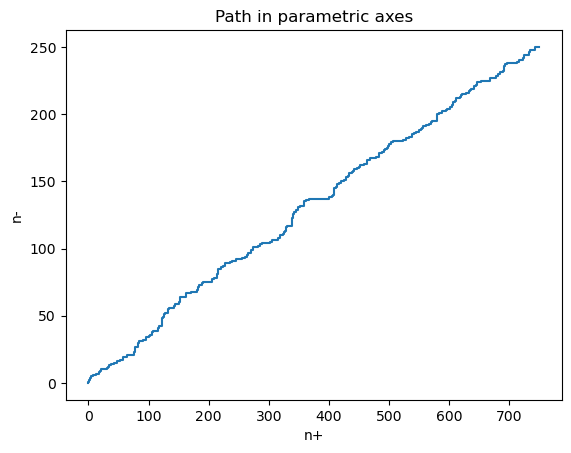

[[1.         0.         0.         1.        ]
 [1.         0.02316179 0.         1.        ]]


ValueError: array([[1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.02316179, 0.        , 1.        ]]) is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

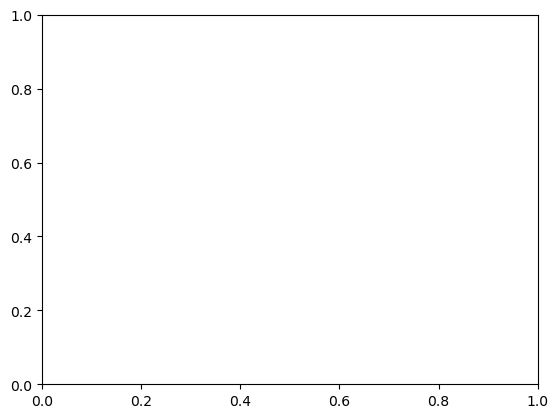

In [421]:
n_ratio = 3 # ratio of N+ / N-
N = 1000
Ns = [int(n_ratio * N / (n_ratio + 1)), int(N / (n_ratio + 1))]
print(Ns)

x = gillespie(Ns)
seq = np.array(x[1:] < x[:-1]) * 1
parametric = [[0],[0]]
for i in seq:
    parametric[i].append(parametric[i][-1] + 1)
    parametric[i-1].append(parametric[i-1][-1])
parametric = np.array(parametric)
plt.plot(parametric[0], parametric[1])
plt.title("Path in parametric axes")
plt.xlabel("n+")
plt.ylabel("n-")
plt.show()


# shift by null path
shift_plus = Ns[0] / N * np.arange(N+1)
shift_minus = Ns[1] / N * np.arange(N+1)
parametric[0] = parametric[0] - shift_plus
parametric[1] = parametric[1] - shift_minus

color = plt.cm.hsv([0,1])
print(color)
plt.plot(parametric[0], parametric[1],c=color)
plt.title("Path in parametric axes")
plt.xlabel("n+")
plt.ylabel("n-")
plt.show()